In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import seaborn as sns

# Data Preprocessing

## Training Image preprocessing

In [2]:
# we will be using keras for image preprocessing

In [3]:
directory1=r"D:\Project Plant disease detection\Dataset\train_new"
training_set=tf.keras.utils.image_dataset_from_directory(
    directory1,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    #data_format=None,
    verbose=True,
)

Found 5702 files belonging to 3 classes.


In [4]:
directory2=r"D:\Project Plant disease detection\Dataset\valid_new"
validation_set=tf.keras.utils.image_dataset_from_directory(
    directory2,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 1426 files belonging to 3 classes.


In [5]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [6]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[107.5   88.5   94.5 ]
   [ 86.75  67.75  73.75]
   [102.75  83.75  89.75]
   ...
   [114.25  94.25 103.25]
   [104.    84.    93.  ]
   [105.75  85.75  94.75]]

  [[102.75  83.75  89.75]
   [102.25  83.25  89.25]
   [108.75  89.75  95.75]
   ...
   [104.25  84.25  93.25]
   [ 90.25  70.25  79.25]
   [104.    84.    93.  ]]

  [[103.75  84.75  90.75]
   [ 91.25  72.25  78.25]
   [103.25  84.25  90.25]
   ...
   [101.25  81.25  90.25]
   [108.5   88.5   97.5 ]
   [ 90.5   70.5   79.5 ]]

  ...

  [[166.   155.   161.  ]
   [168.25 157.25 163.25]
   [168.75 157.75 163.75]
   ...
   [163.25 153.25 161.25]
   [161.   151.   159.  ]
   [155.   145.   153.  ]]

  [[167.25 156.25 162.25]
   [167.5  156.5  162.5 ]
   [175.25 164.25 170.25]
   ...
   [163.75 153.75 161.75]
   [161.25 151.25 159.25]
   [156.   146.   154.  ]]

  [[170.5  159.5  165.5 ]
   [178.5  167.5  173.5 ]
   [165.   154.   160.  ]
   ...
   [171.   161.   169.  ]
   [163.   153.   161.  ]
   [167.75 157.75 16

# Building Model

In [7]:
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [8]:
model=Sequential()

In [9]:
#Adding convolution layer
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation="relu",input_shape=(128,128,3)))
model.add(Conv2D(filters=32,kernel_size=3,activation="relu"))
#Adding max pooling layer
model.add(MaxPool2D(pool_size=2,strides=2))

D:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
#Adding convolution layer
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation="relu"))
model.add(Conv2D(filters=64,kernel_size=3,activation="relu"))
#Adding max pooling layer
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
#Adding convolution layer
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation="relu"))
model.add(Conv2D(filters=128,kernel_size=3,activation="relu"))
#Adding max pooling layer
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
#Adding convolution layer
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation="relu"))
model.add(Conv2D(filters=256,kernel_size=3,activation="relu"))
#Adding max pooling layer
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
#Adding convolution layer
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation="relu"))
model.add(Conv2D(filters=512,kernel_size=3,activation="relu"))
#Adding max pooling layer
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Dropout(0.25))# to avoid overfitting

In [15]:
#Making fully connected layer
model.add(Flatten())

In [16]:
model.add(Dense(units=1500,activation="relu"))

In [17]:
model.add(Dropout(0.4))

In [18]:
#Adding output layer
model.add(Dense(units=3,activation="softmax"))#unit=38 because we have 38 different class and activation is softmax because it 
#will provide probability of each class

# Compiling Model

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

# Model Training

In [21]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 511s 3s/step - accuracy: 0.5828 - loss: 0.9489 - val_accuracy: 0.9074 - val_loss: 0.2656
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 484s 3s/step - accuracy: 0.8946 - loss: 0.2798 - val_accuracy: 0.9376 - val_loss: 0.1598
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 476s 3s/step - accuracy: 0.9511 - loss: 0.1350 - val_accuracy: 0.9327 - val_loss: 0.1830
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 476s 3s/step - accuracy: 0.9494 - loss: 0.1291 - val_accuracy: 0.9783 - val_loss: 0.0684
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 440s 2s/step - accuracy: 0.9705 - loss: 0.0745 - val_accuracy: 0.9390 - val_loss: 0.1859
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 484s 3s/step - accuracy: 0.9782 - loss: 0.0616 - val_accuracy: 0.9881 - val_loss: 0.0405
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 464s 3s/step - accuracy: 0.9816 - loss: 0.0553 - val_accuracy: 0.9818 - val_loss: 0.0721
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 466s 3s/step - accuracy: 0.9851 - loss: 0.0473 - val_accu

# model Evaluation

In [22]:
train_loss,train_acc=model.evaluate(training_set)

179/179 ━━━━━━━━━━━━━━━━━━━━ 121s 640ms/step - accuracy: 0.9983 - loss: 0.0102


In [23]:
print(train_loss,train_acc)

0.011570720933377743 0.9980708360671997


In [24]:
val_loss,val_acc=model.evaluate(validation_set)

45/45 ━━━━━━━━━━━━━━━━━━━━ 32s 587ms/step - accuracy: 0.9819 - loss: 0.0636


In [25]:
print(val_loss,val_acc)

0.05670638382434845 0.9859747290611267


# model Saving

In [27]:
model.save("Trained_model.keras")

In [28]:
training_history.history

{'accuracy': [0.7146615386009216,
  0.9119607210159302,
  0.9570326209068298,
  0.9549281001091003,
  0.9726411700248718,
  0.9773763418197632,
  0.977200984954834,
  0.9887758493423462,
  0.9849175810813904,
  0.9954401850700378],
 'loss': [0.658715546131134,
  0.23486366868019104,
  0.12714514136314392,
  0.12261486798524857,
  0.07064758241176605,
  0.06255783140659332,
  0.0664534941315651,
  0.03371954709291458,
  0.04176788032054901,
  0.015996742993593216],
 'val_accuracy': [0.9074333906173706,
  0.9375876784324646,
  0.9326788187026978,
  0.97826087474823,
  0.9389901757240295,
  0.9880785346031189,
  0.9817671775817871,
  0.9670406579971313,
  0.9852734804153442,
  0.9859747290611267],
 'val_loss': [0.26563772559165955,
  0.15982532501220703,
  0.1829807460308075,
  0.06840777397155762,
  0.1859499216079712,
  0.040528904646635056,
  0.07209454476833344,
  0.11215516179800034,
  0.05460529401898384,
  0.05670639127492905]}

In [29]:
# Recording history in json
import json
with open("Training_hist.json","w") as f:
    json.dump(training_history.history,f)

## Accuracy Visulization

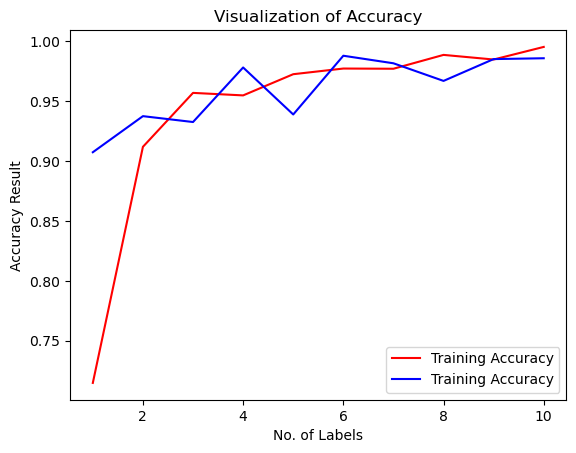

In [36]:
epochs= [i for i in range(1,11)]
plt.plot(epochs,training_history.history["accuracy"],color="red",label='Training Accuracy')
plt.plot(epochs,training_history.history["val_accuracy"],color="blue",label='Training Accuracy')
plt.xlabel("No. of Labels")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy")
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [37]:
class_name=validation_set.class_names

In [38]:
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [39]:
directory2=r"D:\Project Plant disease detection\Dataset\valid_new"
test_set=tf.keras.utils.image_dataset_from_directory(
    directory2,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 1426 files belonging to 3 classes.


In [40]:
y_pred=model.predict(test_set)
y_pred

45/45 ━━━━━━━━━━━━━━━━━━━━ 37s 578ms/step


array([[1.0000000e+00, 1.9000628e-09, 2.1344722e-14],
       [9.9773055e-01, 3.4870207e-04, 1.9207343e-03],
       [1.0000000e+00, 1.9848258e-16, 2.9810173e-18],
       ...,
       [7.6552624e-08, 1.1301811e-06, 9.9999881e-01],
       [1.6834690e-07, 3.8168440e-07, 9.9999952e-01],
       [3.3134693e-12, 2.0674198e-11, 1.0000000e+00]], dtype=float32)

In [41]:
y_pred.shape

(1426, 3)

In [42]:
predicted_categories=tf.argmax(y_pred,axis=1)

In [44]:
predicted_categories

<tf.Tensor: shape=(1426,), dtype=int64, numpy=array([0, 0, 0, ..., 2, 2, 2], dtype=int64)>

In [49]:
true_categories=tf.concat([y for x,y in test_set],axis=0)
true_categories


<tf.Tensor: shape=(1426, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)>

In [50]:
Y_true=tf.argmax(true_categories,axis=1)

In [51]:
Y_true

<tf.Tensor: shape=(1426,), dtype=int64, numpy=array([0, 0, 0, ..., 2, 2, 2], dtype=int64)>

In [52]:
#precision-> it measures the percentage of predictions made by the model that are correct
#Recall--> It measures the percentage of relevant data points that were correctly identified by the model

In [56]:
from sklearn.metrics import classification_report,confusion_matrix

In [55]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                       precision    recall  f1-score   support

Potato___Early_blight       0.99      0.98      0.99       485
 Potato___Late_blight       0.98      0.99      0.98       485
     Potato___healthy       0.99      0.99      0.99       456

             accuracy                           0.99      1426
            macro avg       0.99      0.99      0.99      1426
         weighted avg       0.99      0.99      0.99      1426



In [57]:
cm=confusion_matrix(Y_true,predicted_categories)

In [58]:
cm.shape

(3, 3)

In [60]:
print(cm)

[[477   8   0]
 [  3 479   3]
 [  2   4 450]]


## confusion matrix visualization

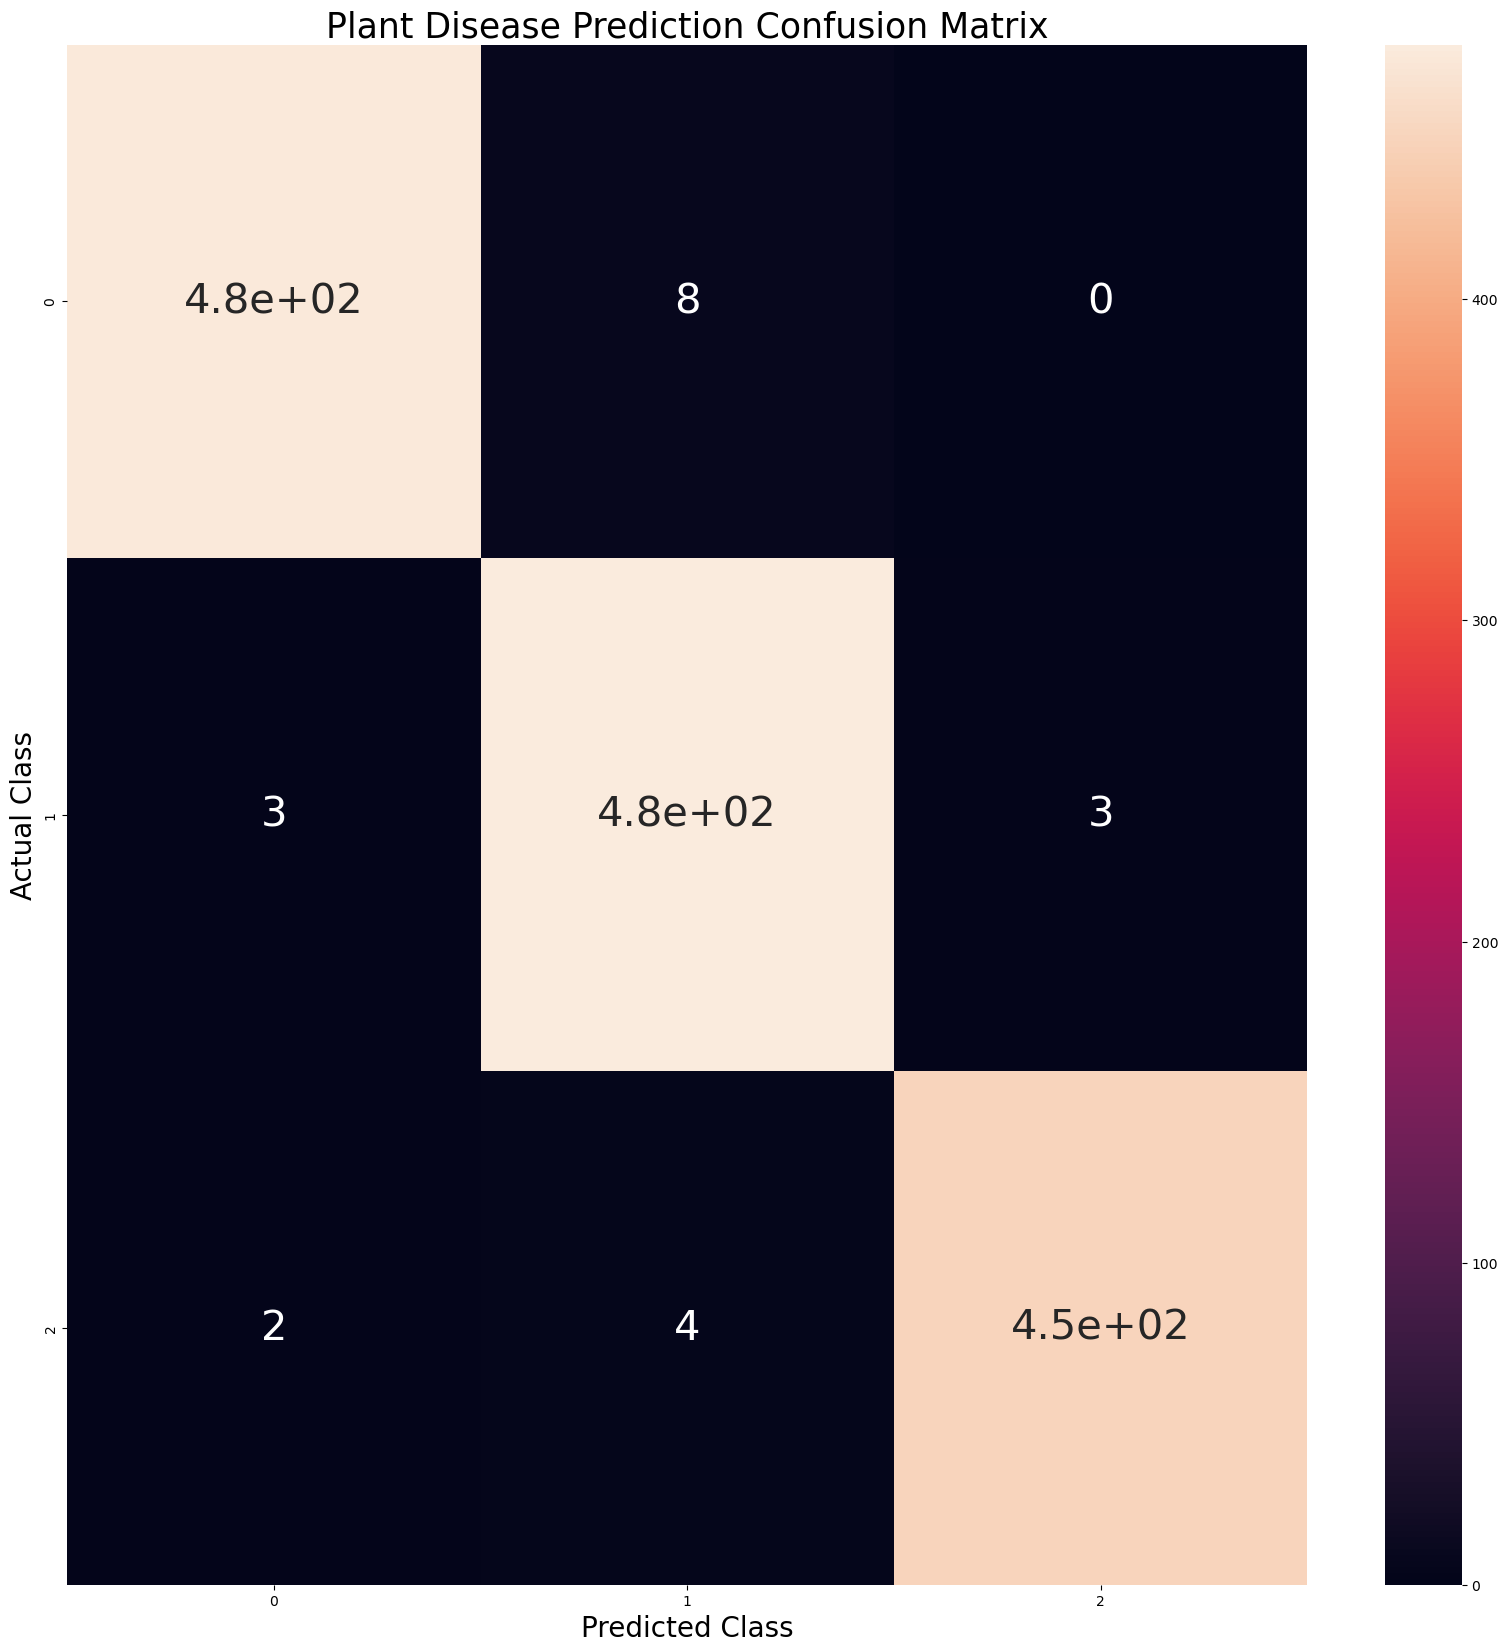

In [69]:
plt.figure(figsize=(20,20))
sns.heatmap(cm,annot=True,annot_kws={"size":30})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()